<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 
- Bryan Azahel Juárez Pineda.
- Rodrigo Martínez Gallardo Bertoldi

**Fecha:** 03 de marzo del 2021.

**Expediente** : 
- 722176.
- 722268
    
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 5: Clase 9.

[Liga al repositorio](https://github.com/Bryan722176/ProyectoConjunto_RMartinez_BAJuarez)

### Proyecto Conjunto.
> Instrucciones: Cada estudiante debe proponer una solución óptima a los problemas planteados a continuación.

>### <font color ='red'> **Tarea 5** 
    
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).


### _Solución Bryan._

In [7]:
# Importamos las librerías a utilizar.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Solución ejercicio 1.

Para resolver este inciso lo primero que necesitaremos será encontrar como a partir de nuestra función de distribución de probabilidad acumulada genera variables aleatorias, esto lo lograremos a partir del método de la transformada inversa. Recordemos que nuestra función de distribución de probabilidad acumulada se ve de la siguiente manera:

$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$

El método de la transformada inversa nos indica los siguientes pasos.
1. Igualar $F(x)$ a $U$, donde $U \sim \text{Uniforme[0,1]}$
> $$\frac{2}{\pi}\sin^{-1}(\sqrt x) = U$$
2. Encontrar la inversa de $F(x)$ de manera que $X = F^{-1}(U)$
> $$X = sin^{2}\big(\frac{u\pi}{2}\big)$$, $$\text{donde } X \sim f(x)$$

A manera de comprobación, buscaremos encontrar la función de distribución de probabilidad, es decir, $f(x)$. Para encontrar esto, debido a que conocemos $F(x)$ derivaremos, de forma que la operación a efectuar será la siguiente:

$$ \frac{dF(x)}{dx} $$

Recordando:
> $$\frac{d}{dv}sin^{-1}(v) = \frac{v^{'}}{\sqrt{1-v^{2}}}$$

De manera que, la derivada de $F(x)$ será:
> $$f(x) = \frac{1}{\pi\sqrt{x-x^{2}}}$$

**Ahora, ya conociendo como distribuyen nuestras variables aleatorias y como generar las mismas, podemos visualizar graficamente la validez del proceso y los resultados antes descritos.**

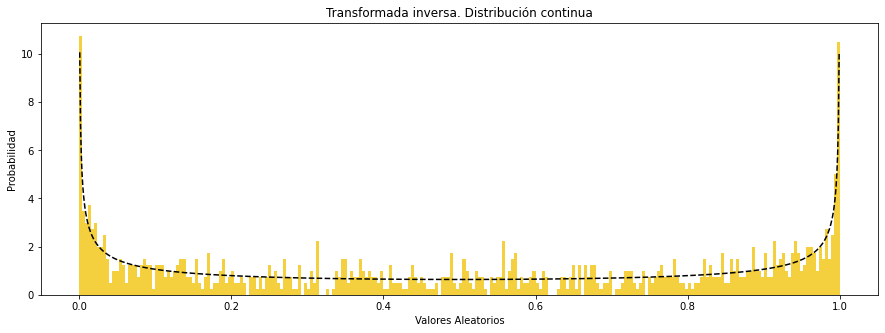

In [2]:
# Solución ejercicio 1.
# Comenzamos definiendo una función que genere nuestras variables aleatorias.
def v_aleatorias(N: 'Number of values to be generated'):
    # A partir del método de la transformada inversa, este será la manera en que se generan variables aleatorias.
    return np.sin((np.random.random(N) * np.pi) / 2)**2

# Generamos nuestras variables aleatorias.
N_x = 1000
x = v_aleatorias(N_x);

# Para poder comprobar la efectividad del generador de variables aleatorias, simularemos la distribución f(x).
x2 = np.arange(0.001, 1, 0.001)
f_x = 1 / ((np.pi)*(np.sqrt(x2-x2**2)))

# Graficamos tanto nuestra distribución como las variables aleatorias generadas.
plt.figure(figsize=[15,5])
plt.plot(x2,f_x,'k--')
plt.hist(x, bins=250, color='#F4D03F', density=True)
plt.xlabel('Valores Aleatorios')
plt.ylabel('Probabilidad')
plt.title('Transformada inversa. Distribución continua')
plt.show()

Podemos observar en la gráfica anterior, como el comportamiento de nuestras variables aleatorias generadas siguen un comportamiento similar a la función de distribución de probabilidad.

#### Solución ejercicio 2.

Para resolver este ejercicio, recordemos que el proceso a realizar será el siguiente:
1. Generar un número uniforme $U$ entre (0,1).
2. Encontrar $k\in\{1,\cdots,n\}$ tal que $q_{k-1}<U\leq q_k$
3. Tomar $X=c_k$.

Donde $q_k$ representa el valor de la probabilidad acumulada en el k-esimo punto.

Recordando que en clase se generó una función tanto para generar variables aleatorias discretas como su respectivo histogrma, a continuación se presentarán.

In [8]:
# Solución ejercicio 2.
# Función para generar variables aleatorias de una distribución discreta.
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U = np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)
    
    return y

In [9]:
# Función para graficar histogramas de una distribución discreta.
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            title:'título del histograma',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[15,5])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, color='#F4D03F', align='center', label=label)
    plt.title(title)
    plt.legend()
    plt.show()

In [10]:
# Definimos una función para calcular la probabilidad acumulada.
def probacum_binomial(n, p):
    
    '''Esta función retorna el valor de la probabilidad acumulada'''
    
    # Definimos un vector de ceros donde almacenaremos los valores de las probabilidades.
    prob = np.zeros(n)
    # Inicializamos la primera posición del vector.
    prob[0] = (1-p)**n
    
    # Utilizaremos una función que nos ayude a definir los valores del vector en las posiciones siguientes.
    # Recordemos que está definido por la siguiente expresión ((n-i)/(i+1)) * (p/(1-p)) * pi
    def probabilidad_i(i):
        nonlocal prob
        prob[i+1] = ((n-i)/(i+1)) * (p/(1-p)) * prob[i]
        
    # Llenamos el vector de manera iterativa para los n valores.
    [probabilidad_i(i) for i in range(n-1)]
    
    # Regresamos un vector con las probabilidades acumuladas.
    return np.cumsum(prob)

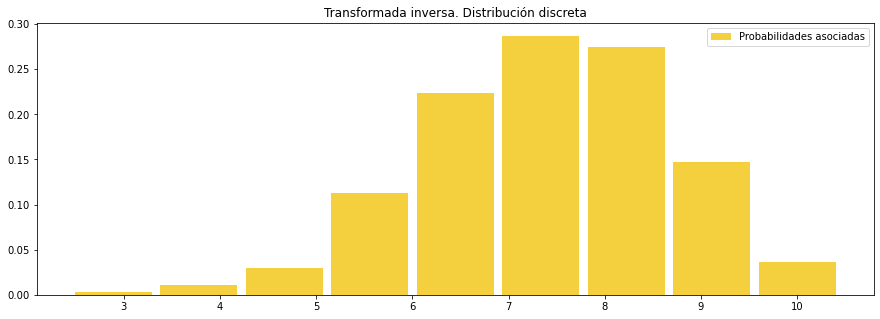

In [11]:
# Ya con la probabilidad acumulada definida, ahora generaremos las variables aleatorias correspondientes.
# Definimos los parámetros n y p descritos en el problema. También la cantidad de muestras a generar.
n = 10
p = 0.7
N_muestras = 1000
indices = np.arange(0,n+1)

# Calculamos probabilidad acumulada.
prob_acumulada = probacum_binomial(n,p)

# Definimos las muestras aleatorias
var_binomial = Gen_distr_discreta(prob_acumulada, indices, N_muestras)

# Ya con las muestras aleatorias generadas, graficaremos el histograma correspondiente.
plot_histogram_discrete(var_binomial, 'Transformada inversa. Distribución discreta', 'Probabilidades asociadas',
                        True)

A manera de comparación graficaremos la misma situación para una distribución binomial con las paqueterías de python.

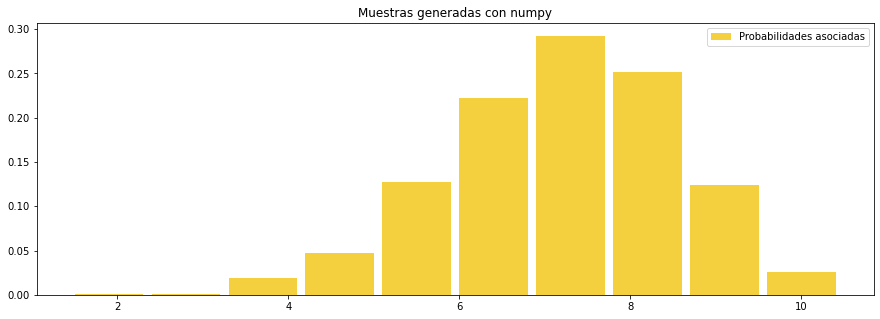

In [12]:
# Definimos los valores para la distribución con python.
prob_numpy = np.random.binomial(n,p,N_muestras)

# Graficamos las muestras generadas.
plot_histogram_discrete(prob_numpy, 'Muestras generadas con numpy', 'Probabilidades asociadas', True)

Observamos como ambos histogramas tienen un comportamiento similar, lo cual nos da indicios de que generamos de manera correcta las variables aleatorias con la distribución binomial.

### _Solución Rodrigo._

> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    

> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

$$X = F^{-1}(x)=\sin^{2}(\frac{x\pi}{2}) = \sin^{2}(\frac{u\pi}{2})$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def p_max(N):
    return (np.sin(np.random.random(N)*np.pi/2))**2

0.499384219069427


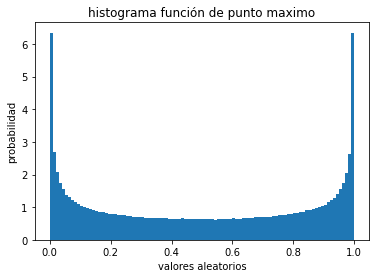

In [5]:
N = 10**6 

x = p_max(N)

plt.hist(x,100,density=True)
plt.xlabel('valores aleatorios')
plt.ylabel('probabilidad')
plt.title('histograma función de punto maximo')
print(np.mean(x))
plt.show()

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

In [6]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}
    # Series de los valores aletorios
    y =pd.Series([sum([1 for p in p_acum if p<ui]) for ui in U]).map(rand2reales)
    return y

In [9]:
def p_acum_binom(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

In [8]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

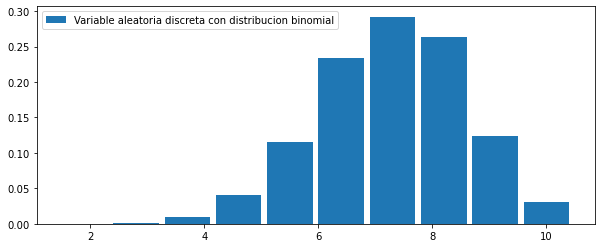

In [14]:
n = 10
p = 0.7
N = 10**4

p_acum = p_acum_binom(n,p)

# Usando el método de la transformada inversa
d_binom = Gen_distr_discreta(p_acum, np.arange(0, n+1), N)

plot_histogram_discrete(d_binom, 'Variable aleatoria discreta con distribucion binomial', True)